## Time Series Analysis
Time Series analysis is a hot topic in Finance, Social Networking and many other fields. This article focuses on scrutinising Time Series data. Note that It is not focusing on making Time Series models like ARMA, GARCH etc. rather it focuses on pandas methods usage for anatomy of Data. Data has been used as in Pandas cookbook by Theodore, crime.h5, where HDF5 or .h5 is a hierarchical data format. A good abstraction to think about is a Python dictionary, where a set of keys are mapped to a set of values. Just like a dictionary, you can get the dataset associated with a key in an HDF5 using a file descriptor.


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

** Date Time in Python and Pandas ** 
Python has `datetime` module which has three datatypes date, time and datetime whereas pandas has a single object for date and time called timestamp and is derived from NumPy's `datetime64` datatype. Pandas has precision of nanoseconds and Python has microseconds. 

In [6]:
crime = pd.read_hdf('./pandas_foundation/data/crime.h5','crime')
crime.dtypes

OFFENSE_TYPE_ID              category
OFFENSE_CATEGORY_ID          category
REPORTED_DATE          datetime64[ns]
GEO_LON                       float64
GEO_LAT                       float64
NEIGHBORHOOD_ID              category
IS_CRIME                        int64
IS_TRAFFIC                      int64
dtype: object

Set REPORTED_DATE as index faster and intelligent TimeStamp Slicing possible. 

In [7]:
crime = crime.set_index('REPORTED_DATE')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


Select all rows having same index using `.loc`

In [8]:
crime.loc['2014-06-29 02:01:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:01:00,police-false-information,all-other-crimes,-105.000149,39.745753,cbd,1,0


Select rows having partial match of index

In [63]:
crime.loc['2014-06-29'].head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


Not only with full date, one can access information with Year and month, month only and year only and year, month, date, hour only. Let's see examples.

In [11]:
crime.loc['2014-06'].shape

(7175, 7)

In [12]:
crime.loc['2014'].shape

(84421, 7)

In [13]:
crime.loc['2014-06-14 03'].shape

(14, 7)

In [19]:
# one can access with month name as well. You can sort index with '.sort_index()'
crime.loc['Dec 2014'].sort_index().shape
# another string variants which could be used are
crime.loc['2016 Sep, 15'].shape
crime.loc['21st oct 2014 05']
# or 
crime.loc['21st october 2014 05']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-10-21 05:19:00,traf-other,all-other-crimes,-105.006459,39.769287,highland,1,0
2014-10-21 05:11:00,criminal-trespassing,all-other-crimes,-104.962105,39.676030,university,1,0
2014-10-21 05:47:00,harassment-dv,public-disorder,-104.765032,39.801407,dia,1,0
2014-10-21 05:00:00,criminal-mischief-mtr-veh,public-disorder,-105.020969,39.756938,jefferson-park,1,0


In [25]:
# filter out from A to B datetime
crime.loc['2015-03-04':'2016-11-12']
# or just by year and sort by index
crime.loc['2015':'2016'].sort_index().shape

(180224, 7)

In [32]:
# select particular columns of particular row
# following command selects 3 columns from 2015 year

crime.loc['2015', ['OFFENSE_TYPE_ID', 'GEO_LAT', 'IS_CRIME']].head()

,OFFENSE_TYPE_ID,GEO_LAT,IS_CRIME
REPORTED_DATE,,,
2015-12-18 23:51:00,theft-of-motor-vehicle,39.708538,1
2015-11-16 14:59:00,traffic-accident,39.740281,0
2015-06-08 06:46:00,traffic-accident,39.768386,0
2015-09-30 12:15:00,traffic-accident,39.740439,0
2015-04-10 11:47:00,traffic-accident,39.717430,0


Note: `.loc` indexer is prefered to use when one has to select rows by label/index or select by boolean/conditional lookup. There is one more indexer `iloc` available in pandas which is used when rows are to be filtered by integers i.e. `crime.iloc[0]`, this code will filter out first row of crime dataframe.

In [36]:
crime.iloc[:,0]  # filters first column
crime.iloc[1]    #filters first row

OFFENSE_TYPE_ID        vehicular-eluding-no-chase
OFFENSE_CATEGORY_ID              all-other-crimes
GEO_LON                                  -104.885
GEO_LAT                                   39.7387
NEIGHBORHOOD_ID                       east-colfax
IS_CRIME                                        1
IS_TRAFFIC                                      0
Name: 2014-06-29 01:54:00, dtype: object

Talking bit about performance, we have not sorted and then queried yet. Sorting dataframe results faster execution of queries. Let's see with example.

In [37]:
%timeit crime.loc['2015':'2016']

103 ms ± 12.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [39]:
sort_crime = crime.sort_index()
%timeit sort_crime.loc['2015':'2016']

2.23 ms ± 257 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [43]:
#following code works for datetimeIndex only
#filters out crime info happend between 2 to 5 regardless of date 
sort_crime.between_time('2:00', '5:00', include_end=False).head()

#filter crime detail at specific date
sort_crime.at_time('5:45').head()


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-26 05:45:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.944069,39.717634,cherry-creek,1,0
2012-01-27 05:45:00,theft-of-motor-vehicle,auto-theft,-104.890378,39.624962,hampden-south,1,0
2012-02-16 05:45:00,theft-other,larceny,-104.983803,39.760916,five-points,1,0
2012-03-15 05:45:00,burglary-residence-no-force,burglary,-104.907328,39.677837,goldsmith,1,0
2012-03-25 05:45:00,burglary-business-by-force,burglary,-105.016043,39.737355,lincoln-park,1,0


We have seen an elegent way of selecting rows between two times. These rows are formlly represented as `dateOffset` objects. Data must be sorted on its index to guarantee that this method would work.  

In [50]:
#
sort_crime.first(pd.offsets.MonthBegin(5)).shape
#
sort_crime.first(pd.offsets.MonthEnd(5)).shape
#above two searches are partial one day is added or one day is dropped in getting first 5 months data cuz 
#search takes time into account as well
#to get exact 5 months data we have following line of code

sort_crime.first(pd.offsets.MonthBegin(5, normalize=True)).shape

(22411, 7)

Find number of weekly, yearly crimes with `resample` method available. The object returned by resample is quite similar to object returned by `groupby`. `resample` method returns an object that is ready to perform an action on each week, year as a group. `resample` method works implicitly with DatetimeIndex. The first parameter is the rule determining how TimeStamps in the index will be grouped. Lets see examples

In [56]:
#filter weekly crimes 
#NOTE that Sunday is chosen as last day of the week and Monday as starting. 
sort_crime.resample('W').size().head()

# to choose different day let say Thrusday.
#sort_crime.resample('W-THU').size().head() 


REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

In [57]:
#yearly crimes
sort_crime.resample('Y').size()

REPORTED_DATE
2012-12-31    57037
2013-12-31    69527
2014-12-31    84421
2015-12-31    89148
2016-12-31    91076
2017-12-31    69702
Freq: A-DEC, dtype: int64

Nearly all functionality of `resample` can be reproduced by `groupby` method i.e `sort_crime.groupby(pd.Grouper(freq='W')).size()`. All available resample methods can be found using `[attr for attr in dir(sort_crime.resample('W')) if attr[0].islower()]`. Another point to note about `resample` method is if index does not contain time stamp then use `crime.resample('W', on='REPORTED_DATE').size()`.

### Aggregate Quarterly traffic accidents and crimes separately

In [64]:
#using resample method 
# Q alias represents end of the quarter, if you want from start of quarter alias is QS. 
crime_traffic_rate = sort_crime.resample('Q')['IS_CRIME', 'IS_TRAFFIC'].sum()

#NOTE if we will not select specific columns as IS_CRIME and IS_TRAFFIC and run sort_crime.resample('Q').sum(), we will get
#sum of all numerical, categorical will be ignored.

crime_traffic_rate.head()


,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442


Above operation could be implementaed with groupby operation as `sort_crime.groupby(pd.Grouper(freq='Q'))['IS_CRIME', 'IS_TRAFFIC'].sum()`

In [75]:
crime_traffic_rate.plot()

All Timestamp columns have a special type of attribute called the `dt` accessor, which gives access to a variety of extra attributes and methods specifically designed for them. Now we can use it only when TimeStamp is column if we have converted it in index we can not use `dt` in chain but can use its methods. See below example

In [84]:
# measure crime counts by days, when TimeStamp is not made Index
crime2 = pd.read_hdf('./pandas_foundation/data/crime.h5','crime')
crime2['REPORTED_DATE'].dt.weekday_name.value_counts()

# when TimeStamp is made index
sort_crime.index.weekday_name.value_counts()

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

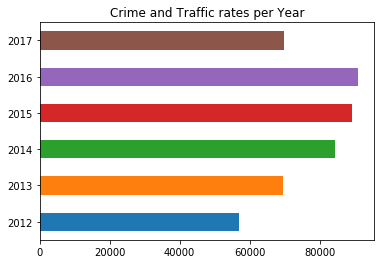

2016    91076
2015    89148
2014    84421
2017    69702
2013    69527
2012    57037
Name: REPORTED_DATE, dtype: int64

In [88]:
# lets ploy yearly crime and traffic accidents 
title = 'Crime and Traffic rates per Year'
sort_crime.index.year.value_counts().sort_index().plot(kind='barh', title=title)
plt.show()
sort_crime.index.year.value_counts()

Let us now focus on easy to read table for number of crimes in a specific year, month and day. We are making 3D table. 

In [113]:
#extract weekday from index
weekday = sort_crime.index.weekday_name
#1-12 represents months
month = sort_crime.index.month
year = sort_crime.index.year
#use groupby operation 
crime_rate = sort_crime.groupby([weekday,month, year]).size()
#unstack the output of crime_rate 
crime_rate_table = crime_rate.rename_axis(['month', 'weekday', 'year']).unstack('weekday')
crime_rate_table

weekday             1       2       3       4       5       6       7   \
month     year                                                           
Friday    2012   588.0   577.0   742.0   691.0   720.0   886.0   703.0   
          2013   657.0   682.0   730.0   603.0   957.0   884.0   973.0   
          2014  1081.0   907.0   996.0   995.0  1260.0  1018.0   915.0   
          2015  1153.0   934.0   991.0  1034.0  1254.0  1043.0  1343.0   
          2016  1306.0  1063.0  1074.0  1386.0  1101.0  1083.0  1256.0   
          2017  1019.0  1044.0  1312.0  1099.0  1150.0  1455.0  1173.0   
Monday    2012   654.0   587.0   605.0   796.0   680.0   768.0   889.0   
          2013   689.0   600.0   640.0   841.0   765.0   964.0  1203.0   
          2014   873.0   991.0  1228.0   927.0   923.0  1305.0  1054.0   
          2015  1001.0   954.0  1149.0  1079.0   955.0  1385.0  1105.0   
          2016  1055.0  1287.0  1017.0  1120.0  1283.0  1016.0   980.0   
          2017  1271.0   981.0  1082.0  1114.0  1405.0  1173.0  1333.0   
Saturday  2012   500.0   458.0   635.0   581.0   589.0   801.0   644.0   
          2013   601.0   530.0   570.0   542.0   619.0  1008.0   805.0   
          2014   669.0   749.0  1093.0   869.0  1109.0   883.0   940.0   
          2015  1064.0   779.0   795.0   933.0  1193.0   954.0   966.0   
          2016  1020.0   869.0   848.0  1093.0   919.0   903.0  1063.0   
          2017   827.0   868.0   909.0  1095.0   921.0   916.0  1131.0   
Sunday    2012   498.0   465.0   500.0   676.0   534.0   581.0   723.0   
          2013   503.0   464.0   558.0   485.0   619.0   951.0   815.0   
          2014   669.0   763.0   913.0   754.0   804.0   977.0   880.0   
          2015   765.0   619.0   942.0   856.0  1059.0   805.0   924.0   
          2016  1053.0   804.0   764.0   740.0  1118.0   861.0   995.0   
          2017   996.0   776.0   776.0  1037.0   875.0   863.0  1069.0   
Thursday  2012   610.0   606.0   741.0   690.0   884.0   689.0   757.0   
          2013   834.0   637.0   548.0   621.0  1026.0   935.0   905.0   
          2014  1089.0   890.0   976.0   826.0  1174.0   978.0  1258.0   
          2015  1208.0   848.0  1001.0  1314.0  1091.0  1034.0  1312.0   
          2016  1056.0  1077.0  1344.0  1176.0  1079.0  1397.0  1084.0   
          2017  1011.0  1052.0  1292.0  1009.0  1064.0  1446.0  1182.0   
Tuesday   2012   686.0   528.0   576.0   628.0   846.0   627.0   877.0   
          2013   835.0   514.0   579.0   758.0   787.0   935.0  1178.0   
          2014   812.0   945.0   916.0  1138.0   900.0   945.0  1273.0   
          2015  1016.0  1002.0  1227.0   989.0  1065.0  1366.0  1054.0   
          2016   989.0   934.0  1174.0  1044.0  1351.0  1013.0  1033.0   
          2017  1400.0  1062.0   982.0  1005.0  1375.0  1086.0  1075.0   
Wednesday 2012   693.0   756.0   596.0   599.0   895.0   726.0   647.0   
          2013   805.0   594.0   596.0   640.0   924.0   897.0  1133.0   
          2014  1044.0   977.0   921.0  1202.0   995.0  1069.0  1267.0   
          2015  1006.0   952.0   957.0  1234.0   988.0  1106.0  1316.0   
          2016  1085.0  1002.0  1176.0  1155.0  1161.0  1396.0  1125.0   
          2017  1022.0  1041.0  1286.0  1053.0  1374.0  1104.0  1074.0   

weekday             8       9       10      11      12  
month     year                                          
Friday    2012   908.0   704.0   642.0   752.0   636.0  
          2013  1126.0   989.0   912.0  1011.0   856.0  
          2014  1330.0  1002.0  1357.0   955.0   867.0  
          2015  1115.0  1046.0  1427.0  1029.0   904.0  
          2016  1062.0  1424.0  1117.0   963.0  1224.0  
          2017  1242.0  1183.0     NaN     NaN     NaN  
Monday    2012   756.0   706.0   870.0   691.0   784.0  
          2013   959.0  1057.0   887.0   843.0  1179.0  
          2014  1059.0  1292.0  1020.0   943.0  1198.0  
          2015  1456.0  1047.0  1080.0  1257.0   984.0  
          2016  1422.0  1071.0  1477.0  1023.0   957.0  
  

In [124]:
#lets do some more data analysis on above table
#filter out year and monthly crime rate for weekday Friday

friday_cr = crime_rate_table.loc['Friday']
friday_cr

weekday,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2012,588.0,577.0,742.0,691.0,720.0,886.0,703.0,908.0,704.0,642.0,752.0,636.0
2013,657.0,682.0,730.0,603.0,957.0,884.0,973.0,1126.0,989.0,912.0,1011.0,856.0
2014,1081.0,907.0,996.0,995.0,1260.0,1018.0,915.0,1330.0,1002.0,1357.0,955.0,867.0
2015,1153.0,934.0,991.0,1034.0,1254.0,1043.0,1343.0,1115.0,1046.0,1427.0,1029.0,904.0
2016,1306.0,1063.0,1074.0,1386.0,1101.0,1083.0,1256.0,1062.0,1424.0,1117.0,963.0,1224.0
2017,1019.0,1044.0,1312.0,1099.0,1150.0,1455.0,1173.0,1242.0,1183.0,NaN,NaN,NaN


`crime_rate_table.loc[('Friday',2012)]` could also be used to extract series of Friday 2012 crime and accidents numbers. You can run above comman in your local machine.


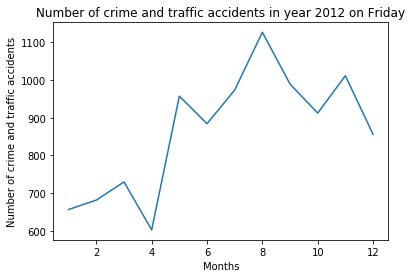

In [127]:
friday_cr.iloc[1].plot()
plt.title('Number of crime and traffic accidents in year 2012 on Friday')
plt.xlabel('Months');plt.ylabel('Number of crime and traffic accidents')
plt.show()

Following command filters by weekday and same year across all months. 

In [168]:

crime_table2 = crime_rate_table.loc[pd.IndexSlice[:, 2012],:]
crime_table2

,weekday,1,2,3,4,5,6,7,8,9,10,11,12
month,year,,,,,,,,,,,,
Friday,2012,588.0,577.0,742.0,691.0,720.0,886.0,703.0,908.0,704.0,642.0,752.0,636.0
Monday,2012,654.0,587.0,605.0,796.0,680.0,768.0,889.0,756.0,706.0,870.0,691.0,784.0
Saturday,2012,500.0,458.0,635.0,581.0,589.0,801.0,644.0,626.0,745.0,581.0,587.0,695.0
Sunday,2012,498.0,465.0,500.0,676.0,534.0,581.0,723.0,618.0,776.0,531.0,589.0,698.0
Thursday,2012,610.0,606.0,741.0,690.0,884.0,689.0,757.0,863.0,635.0,599.0,719.0,647.0
Tuesday,2012,686.0,528.0,576.0,628.0,846.0,627.0,877.0,718.0,717.0,776.0,607.0,605.0
Wednesday,2012,693.0,756.0,596.0,599.0,895.0,726.0,647.0,898.0,647.0,756.0,588.0,639.0


In [169]:
crime_table2.loc['Saturday']


weekday,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2012,500.0,458.0,635.0,581.0,589.0,801.0,644.0,626.0,745.0,581.0,587.0,695.0


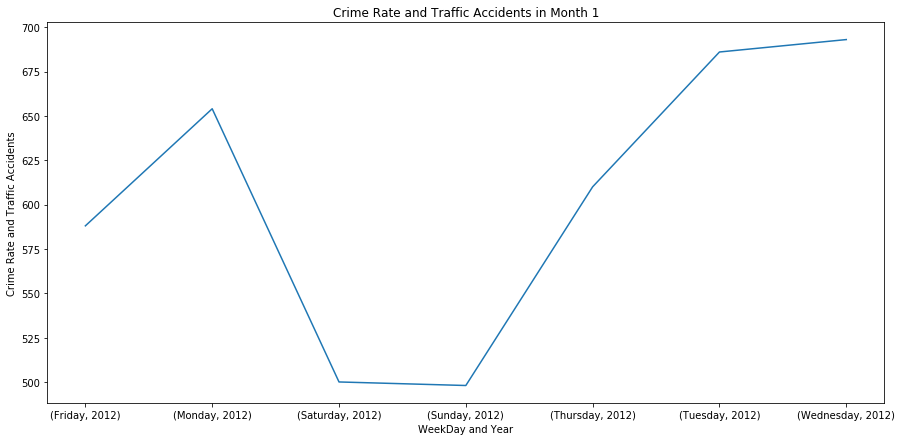

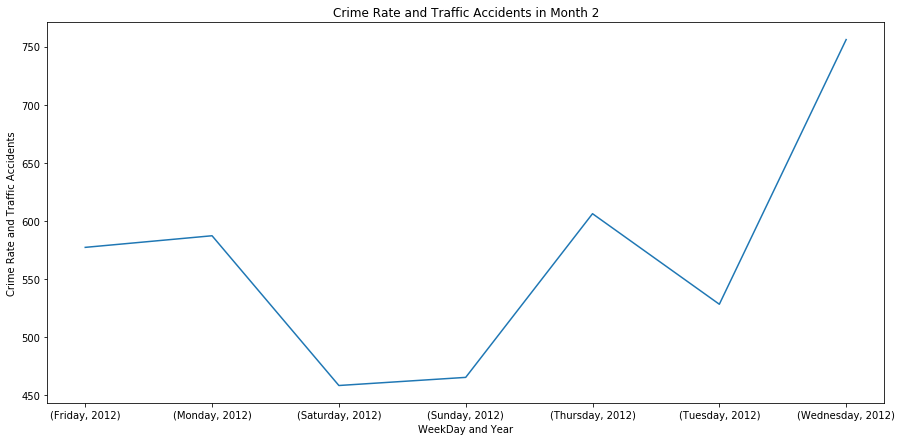

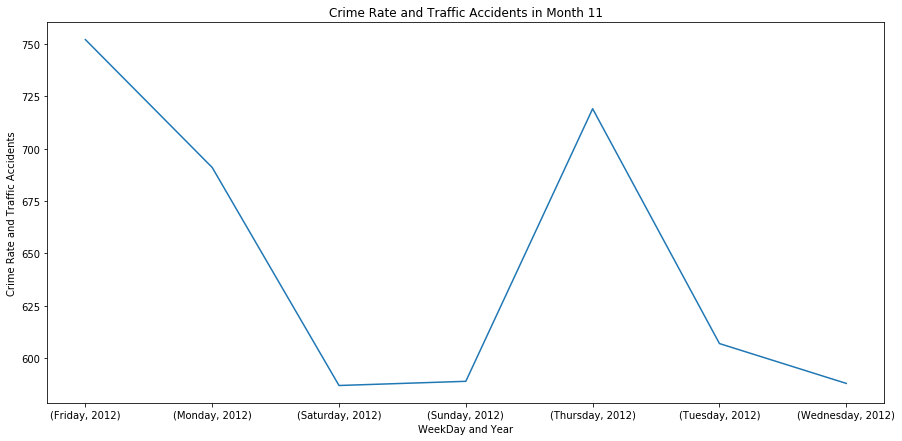

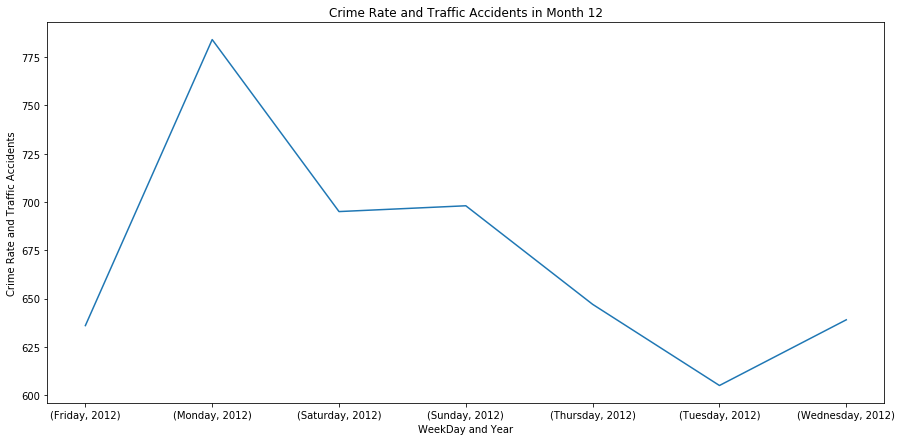

In [176]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
#crime number in month 1
crime_table2.loc[:,1].plot()
plt.title('Crime Rate and Traffic Accidents in Month 1')
plt.xlabel('WeekDay and Year');plt.ylabel('Crime Rate and Traffic Accidents')
plt.show()

#crime number in month2 
plt.title('Crime Rate and Traffic Accidents in Month 2')
crime_table2.loc[:,2].plot()
plt.xlabel('WeekDay and Year');plt.ylabel('Crime Rate and Traffic Accidents')
plt.show()

#crime number in month 3 
plt.title('Crime Rate and Traffic Accidents in Month 11')
crime_table2.loc[:,11].plot()
plt.xlabel('WeekDay and Year');plt.ylabel('Crime Rate and Traffic Accidents')
plt.show()

#crime number in month 4
plt.title('Crime Rate and Traffic Accidents in Month 12')
crime_table2.loc[:,12].plot()
plt.xlabel('WeekDay and Year');plt.ylabel('Crime Rate and Traffic Accidents')
plt.show()

**Inference from graphs**
First graph shows that crime and traffic accidents are higher when it was Wednesday and January 2012. Second plot says same as well on February 2012 but less crime and accidents on Monday as compared to month Jan. Third Graph which is November 2012 says highest crime on Friday and least on Wednesday which is totally opposite to starting months of year 2012. Since We have just examined four months of same year, deeper Analysis would require more work. Analysis also depends on what business problem you are working with as we can get as many statistics we want but fundamental idea is to understand problem first and then filter out necessary information from data.